In [1]:
import json  
import zipfile
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d = None  
data = None  
with zipfile.ZipFile("./two-sigma-connect-rental-listing-inquiries/train.json.zip", "r") as z:
    for filename in z.namelist():
        print(filename)
        with z.open(filename) as f:
            data = f.read()
            d = json.loads(data.decode("utf-8"))

train.json


In [6]:
my_df = pd.DataFrame(d)
pd.set_option('display.max_columns', 3)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
print(my_df)

        bathrooms  bedrooms                       building_id              created                                        description       display_address                                           features  latitude  listing_id  longitude                        manager_id                                             photos  price           street_address interest_level
4             1.0         1  8579a0b0d54db803821a35a4a615e97a  2016-06-16 05:55:27  Spacious 1 Bedroom 1 Bathroom in Williamsburg!...   145 Borinquen Place  [Dining Room, Pre-War, Laundry in Building, Di...   40.7108     7170325   -73.9539  a10db4590843d78c784171a107bdacb4  [https://photos.renthop.com/2/7170325_3bb5ac84...   2400      145 Borinquen Place         medium
6             1.0         2  b8e75fc949a6cd8225b455648a951712  2016-06-01 05:44:33  BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...             East 44th  [Doorman, Elevator, Laundry in Building, Dishw...   40.7513     7092344   -73.9722  955db33477af4f4

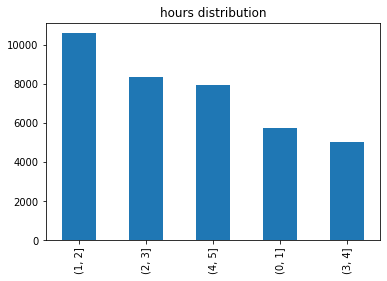

In [7]:
timebins = []
for time_index in range(24):
    timebins.append(time_index)
hours = pd.to_datetime(my_df['created'])
hours = hours.dt.hour

my_df['TimeInterval'] = pd.cut(hours, timebins)
hour_count = pd.value_counts(my_df.TimeInterval).head()
hour_count.plot(kind='bar', title= 'hours distribution')
plt.show()

In [9]:
maxPrice = my_df['price'].max()
step = 2000
priceBin =[]
for index in range(0, maxPrice+1, step):
    priceBin.append(index)

my_df['PriceInterval'] = pd.cut(my_df['price'], priceBin)
df_count = pd.value_counts(my_df.PriceInterval, sort=False)

df_count = df_count.to_frame()
df_count = df_count[(df_count.T != 0).any()]
print(df_count)

                    PriceInterval
(0, 2000]                    5309
(2000, 4000]                31287
(4000, 6000]                 8993
(6000, 8000]                 2294
(8000, 10000]                 591
(10000, 12000]                295
(12000, 14000]                218
(14000, 16000]                147
(16000, 18000]                 56
(18000, 20000]                 53
(20000, 22000]                 13
(22000, 24000]                 12
(24000, 26000]                 16
(26000, 28000]                 13
(28000, 30000]                 20
(30000, 32000]                  4
(34000, 36000]                  5
(36000, 38000]                  2
(38000, 40000]                  2
(44000, 46000]                  2
(48000, 50000]                  4
(50000, 52000]                  2
(52000, 54000]                  1
(54000, 56000]                  1
(58000, 60000]                  2
(78000, 80000]                  1
(84000, 86000]                  1
(88000, 90000]                  1
(98000, 100000

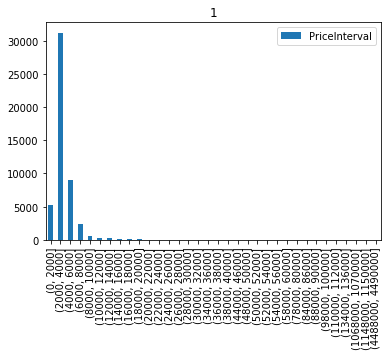

In [10]:
df_count.plot(kind='bar', title= '1')
plt.show()

In [11]:
bins = [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]
my_df['LatitudeInterval'] = pd.cut(my_df['latitude'], bins)
df_count2 = pd.value_counts(my_df.LatitudeInterval)
print(df_count2)

(40, 41]    49312
(42, 43]       13
(41, 42]        9
(44, 45]        2
(39, 40]        2
(43, 44]        1
(34, 35]        1
(38, 39]        0
(37, 38]        0
(36, 37]        0
(35, 36]        0
Name: LatitudeInterval, dtype: int64


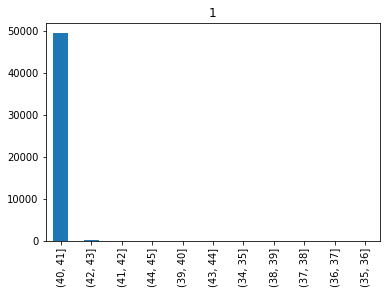

In [12]:
df_count2.plot(kind='bar', title= '1')
plt.show()

In [13]:
bins = [-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10]
my_df['LongitudeInterval'] = pd.cut(my_df['longitude'], bins)
df_count3 = pd.value_counts(my_df.LongitudeInterval)
print(df_count3)

(-80, -70]    49336
(-10, 0]         12
(-90, -80]        2
(0, 10]           0
(-20, -10]        0
(-30, -20]        0
(-40, -30]        0
(-50, -40]        0
(-60, -50]        0
(-70, -60]        0
Name: LongitudeInterval, dtype: int64


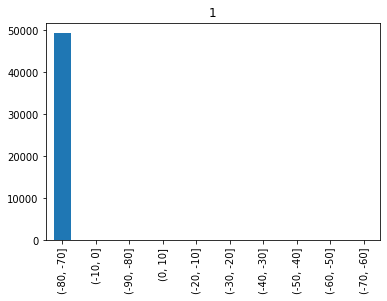

In [14]:
df_count3.plot(kind='bar', title= '1')
plt.show()

In [19]:
doc_df = my_df['description']
print(doc_df)

4         Spacious 1 Bedroom 1 Bathroom in Williamsburg!...
6         BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...
9         **FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...
10        A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
15        Over-sized Studio w abundant closets. Availabl...
                                ...                        
124000    There is 700 square feet of recently renovated...
124002    2 bedroom apartment with updated kitchen, rece...
124004    No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...
124008    Wonderful Bright Chelsea 2 Bedroom apartment o...
124009    ***PRIME MIDTOWN EAST OFF PARK AVE***TRUE 3 BE...
Name: description, Length: 49352, dtype: object
